# Analysis of optogenetic activation experiments with short light pulses
## Comparison across experimental groups

*Experiment*: About 10 flies are placed in the free walking arena and full-field red light stimulation is delivered repeatedly for short periods.
We are looking for changes in the fly's walking velocities that are associated with the optogenetic activation.

In [96]:
from csv import reader
import numpy as np
from sys import path
from scipy import sparse as sps

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from matplotlib import gridspec
from matplotlib import rcParams

import pandas as pd

import os
from os.path import isfile, sep
from glob import glob

libprefix = '/Users/haberkernh/Documents/code/'

path.insert(1, libprefix + 'optogeneticsWalkingArena/')
from freeWalkingOptoPlotting import myAxisTheme

import seaborn as sns
sns.set_style('ticks')

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

%matplotlib inline

### Select data

In [113]:
baseDir = '/Volumes/jayaramanlab/Hannah/Projects/OptoFreeWalking/1_Data/RewardTest_Laura/'
genotype = 'Gr64f-DoubleGal4_x_10xChrimsonRWTB_female_RetWuerzburg'
LEDlevel='10LED'+sep #''

In [114]:
plotSaveDir = baseDir + genotype + sep + LEDlevel + 'plots'
try:
    os.mkdir(plotSaveDir)
except OSError:
    print('Analysis folder already exists')

Analysis folder already exists


### Set experiment parameter

In [115]:
maxExpRep = 6
maxPulseRep = 15
starveLevels = ['24h', '0h']
stimLevels = ['200ms', '500ms']

numRep = 6
repOrder = ['rep'+str(i+1) for i in range(numRep)]

In [116]:
fps = 20
pre = -1
post = 3
timeAx = np.linspace(pre, post, (post-pre)*fps)

arenawidth = 222. #mm
arenawidth_px = 911.
px2mm = arenawidth/arenawidth_px
dt = 1.0/fps

In [117]:
bins = np.linspace(pre, post, 2*(post-pre))
timeBins = np.digitize(timeAx, bins)/2.0 + pre*np.ones(len(timeAx))

bins2 = np.linspace(pre, post, 5*(post-pre))
timeBins2 = np.digitize(timeAx, bins2)/5.0 + pre*np.ones(len(timeAx))

### Make data frame with just averages over all repeats and stimulation protocols

In [118]:
vtav_df = pd.DataFrame(columns=['stim', 'exprep','starved','time','timebins','timebinsf','vt'])
vrav_df = pd.DataFrame(columns=['stim', 'exprep','starved','time','timebins','timebinsf','vr'])

for stim in ['500ms', '200ms']:

    rootDir = baseDir + genotype + sep + LEDlevel + stim + sep + 'analysis'
    expGroup = genotype

    datList = [filepath.split(sep)[-1] for filepath in glob(rootDir + sep + '*.csv')]

    vt_datList = []
    vr_datList = []
    for fn in datList:
        if 'vTrans' in fn:
            vt_datList.append(fn)
        elif 'vRot' in fn:
            vr_datList.append(fn)
        else:
            pass
        
    for fi, currFile in enumerate(vt_datList):
        print(currFile)
        exprep = currFile.split('_')[6]

        # load file specifying data to be analysed
        datFile = open(rootDir+sep+currFile, 'r')
        csv_fileList = reader(datFile)

        vtvals = []

        for i, line in enumerate(csv_fileList):
            vtvals.append(line)

        avvals = px2mm * 1./dt * np.nanmean(np.asarray(vtvals).astype('float'), axis=0)
        curr_df = pd.DataFrame(timeAx, columns=['time'])
        curr_df.insert(0, 'stim',stim)
        curr_df.insert(0, 'timebins',timeBins)
        curr_df.insert(0, 'timebinsf',timeBins2)
        curr_df.insert(1, 'vt',avvals)
        curr_df.insert(3, 'exprep',exprep)
        if '_24h' in currFile:
            curr_df.insert(3, 'starved','24h')
        elif '_12h' in currFile:
            curr_df.insert(3, 'starved','12h')
        elif '_0h' in currFile:
            curr_df.insert(3, 'starved','0h')
        vtav_df = vtav_df.append(curr_df, ignore_index = True)
        
    for fi, currFile in enumerate(vr_datList):
        print(currFile)
        exprep = currFile.split('_')[6]

        # load file specifying data to be analysed
        datFile = open(rootDir+sep+currFile, 'r')
        csv_fileList = reader(datFile)

        vrvals = []

        for i, line in enumerate(csv_fileList):
            vrvals.append(line)

        avvals = 1./dt * np.nanmean(np.asarray(vrvals).astype('float'), axis=0)
        curr_df = pd.DataFrame(timeAx, columns=['time'])
        curr_df.insert(0, 'stim',stim)
        curr_df.insert(0, 'timebins',timeBins)
        curr_df.insert(0, 'timebinsf',timeBins2)
        curr_df.insert(1, 'vr',avvals)
        curr_df.insert(3, 'exprep',exprep)
        if '_24h' in currFile:
            curr_df.insert(3, 'starved','24h')
        elif '_12h' in currFile:
            curr_df.insert(3, 'starved','12h')
        elif '_0h' in currFile:
            curr_df.insert(3, 'starved','0h')
        vrav_df = vrav_df.append(curr_df, ignore_index = True)

Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_0h_rep1_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep1_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_0h_rep3_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep4_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep5_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep2_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep3_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_0h_rep2_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_0h_rep3_vRot_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep1_vRot_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep3_vRot_triggeredAverage.csv
Gr64f-Dou

In [119]:
print(vtav_df.head())
print(vrav_df.head())

  exprep starved   stim      time  timebins  timebinsf         vt
0   rep1      0h  500ms -1.000000      -0.5       -0.8  11.033797
1   rep1      0h  500ms -0.949367      -0.5       -0.8  10.812451
2   rep1      0h  500ms -0.898734      -0.5       -0.8  10.204251
3   rep1      0h  500ms -0.848101      -0.5       -0.8  10.492220
4   rep1      0h  500ms -0.797468      -0.5       -0.8  10.439492
  exprep starved   stim      time  timebins  timebinsf        vr
0   rep3      0h  500ms -1.000000      -0.5       -0.8  1.662942
1   rep3      0h  500ms -0.949367      -0.5       -0.8  1.556571
2   rep3      0h  500ms -0.898734      -0.5       -0.8  1.505886
3   rep3      0h  500ms -0.848101      -0.5       -0.8  1.725098
4   rep3      0h  500ms -0.797468      -0.5       -0.8  1.728848


#### translational speed

Analysis folder already exists


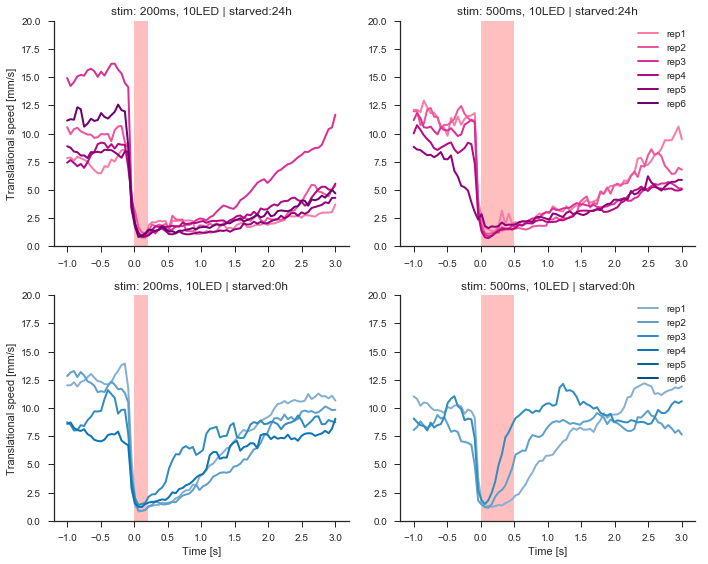

In [120]:
maxExpRep = 6
stimLevels = ['200ms', '500ms']
stimLevelRects = [0.2, 0.5]
repLevels = repOrder
maxY = 20

measuredStarveLevels = []
for starved in starveLevels:
    if not vtav_df.query('starved == "'+starved+'"').empty:
        measuredStarveLevels.append(starved)

fig = plt.figure(figsize=(10,4*max(len(measuredStarveLevels),2)))
for rowind, starved in enumerate(measuredStarveLevels):
    if starved == '0h': colMap = 'PuBu'
    elif 'Control' in genotype or 'control' in genotype or '_Wuerzburg' in genotype: colMap = 'Greens'
    else: colMap = 'RdPu'
    cNorm  = colors.Normalize(vmin=-5, vmax=maxExpRep)
    repCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=colMap)
    
    for colind, stim in enumerate(stimLevels):
        ax = fig.add_subplot(max(len(measuredStarveLevels),2),len(stimLevels),(rowind)*len(stimLevels) + (colind+1))
        for ind, rep in enumerate(repLevels):
            rep_df = vtav_df.query('exprep == "'+rep+'" and stim == "'+stim+'" and starved == "'+starved+'"')
            ax.plot(rep_df['time'].get_values(), rep_df['vt'].get_values(),
                    color=repCMap.to_rgba(ind), linewidth=2)
            ax.set_ylim(0,maxY)
        ax.set_title('stim: '+stim+', '+LEDlevel[:-1]+' | starved:'+starved, fontsize=12)
        if rowind==1: ax.set_xlabel('Time [s]')
        if colind==0: ax.set_ylabel('Translational speed [mm/s]')     
        if colind==1: ax.legend(repLevels, loc=1)
        myAxisTheme(ax)
        
        ax.add_patch(Rectangle((0, 0), stimLevelRects[colind], maxY, facecolor='red', edgecolor='none', lw=1, alpha=0.25))

try:
    os.mkdir(plotSaveDir)
except OSError:
    print('Analysis folder already exists')
    
fig.tight_layout()
fig.savefig(plotSaveDir+sep+genotype+'_'+LEDlevel[:-1]+'_meanTriggeredAverages.pdf', format = 'pdf')

Analysis folder already exists


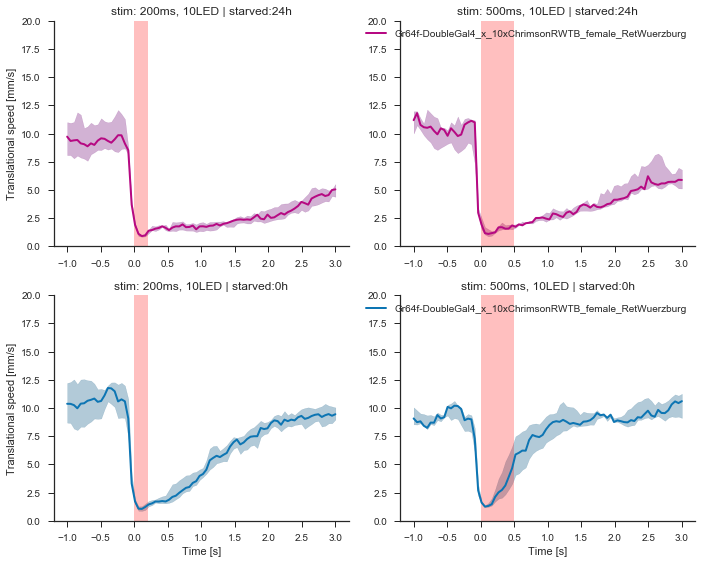

In [121]:
maxY = 20

fig = plt.figure(figsize=(10,4*max(len(measuredStarveLevels),2)))
for rowind, starved in enumerate(measuredStarveLevels):
    if starved == '0h': colMap = 'PuBu'
    elif 'Control' in genotype or 'control' in genotype or '_Wuerzburg' in genotype: colMap = 'Greens'
    else: colMap = 'RdPu'
    cNorm  = colors.Normalize(vmin=-5, vmax=maxExpRep)
    repCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=colMap)
    
    for colind, stim in enumerate(stimLevels):
        velos = np.nan*np.ones((len(repLevels), len(timeAx)))
        for ind, rep in enumerate(repLevels):
            rep_df = vtav_df.query('exprep == "'+rep+'" and stim == "'+stim+'" and starved == "'+starved+'"')
            if rep_df.empty:
                continue
            velos[ind,:] = rep_df['vt'].get_values()
        
        ax = fig.add_subplot(max(len(measuredStarveLevels),2),len(stimLevels),(rowind)*len(stimLevels) + (colind+1))
         
        repMedian = np.nanmedian(velos, axis=0)
        repIQR = np.nanpercentile(velos, [25, 75], axis=0)
        
        leg = ax.plot(timeAx, repMedian, color=repCMap.to_rgba(np.ceil(numRep/2)), linewidth=2)
        ax.fill_between(timeAx, repIQR[0,:], repIQR[1,:], color=repCMap.to_rgba(ind), alpha=0.3, label=None)

        ax.set_ylim(0,maxY)
        ax.set_title('stim: '+stim+', '+LEDlevel[:-1]+' | starved:'+starved, fontsize=12)
        if rowind==1: ax.set_xlabel('Time [s]')
        if colind==0: ax.set_ylabel('Translational speed [mm/s]')     
        if colind==1: ax.legend(leg, [genotype],frameon=False)
        myAxisTheme(ax)
        
        ax.add_patch(Rectangle((0, 0), stimLevelRects[colind], maxY, facecolor='red', edgecolor='none', lw=1, alpha=0.25))

try:
    os.mkdir(plotSaveDir)
except OSError:
    print('Analysis folder already exists')
    
fig.tight_layout()
fig.savefig(plotSaveDir+sep+genotype+'_'+LEDlevel[:-1]+'_repTriggeredAverages_repAverage.pdf', format = 'pdf')

#### abs. rotational velocity

Analysis folder already exists


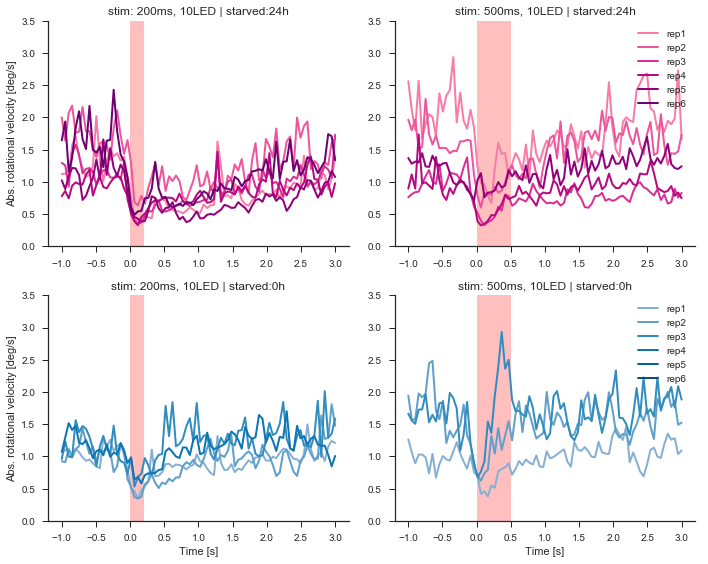

In [122]:
maxExpRep = 6
stimLevels = ['200ms', '500ms']
stimLevelRects = [0.2, 0.5]
repLevels = repOrder
maxY = 3.5

measuredStarveLevels = []
for starved in starveLevels:
    if not vrav_df.query('starved == "'+starved+'"').empty:
        measuredStarveLevels.append(starved)

fig = plt.figure(figsize=(10,4*max(len(measuredStarveLevels),2)))
for rowind, starved in enumerate(measuredStarveLevels):
    if starved == '0h': colMap = 'PuBu'
    elif 'Control' in genotype or 'control' in genotype or '_Wuerzburg' in genotype: colMap = 'Greens'
    else: colMap = 'RdPu'
    cNorm  = colors.Normalize(vmin=-5, vmax=maxExpRep)
    repCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=colMap)
    
    for colind, stim in enumerate(stimLevels):
        ax = fig.add_subplot(max(len(measuredStarveLevels),2),len(stimLevels),(rowind)*len(stimLevels) + (colind+1))
        for ind, rep in enumerate(repLevels):
            rep_df = vrav_df.query('exprep == "'+rep+'" and stim == "'+stim+'" and starved == "'+starved+'"')
            ax.plot(rep_df['time'].get_values(), rep_df['vr'].get_values(),
                    color=repCMap.to_rgba(ind), linewidth=2)
            ax.set_ylim(0,maxY)
        ax.set_title('stim: '+stim+', '+LEDlevel[:-1]+' | starved:'+starved, fontsize=12)
        if rowind==1: ax.set_xlabel('Time [s]')
        if colind==0: ax.set_ylabel('Abs. rotational velocity [deg/s]')     
        if colind==1: ax.legend(repLevels, loc=1)
        myAxisTheme(ax)
        
        ax.add_patch(Rectangle((0, 0), stimLevelRects[colind], maxY, facecolor='red', edgecolor='none', lw=1, alpha=0.25))

try:
    os.mkdir(plotSaveDir)
except OSError:
    print('Analysis folder already exists')
    
fig.tight_layout()
fig.savefig(plotSaveDir+sep+genotype+'_'+LEDlevel[:-1]+'_rot_meanTriggeredAverages.pdf', format = 'pdf')

Analysis folder already exists


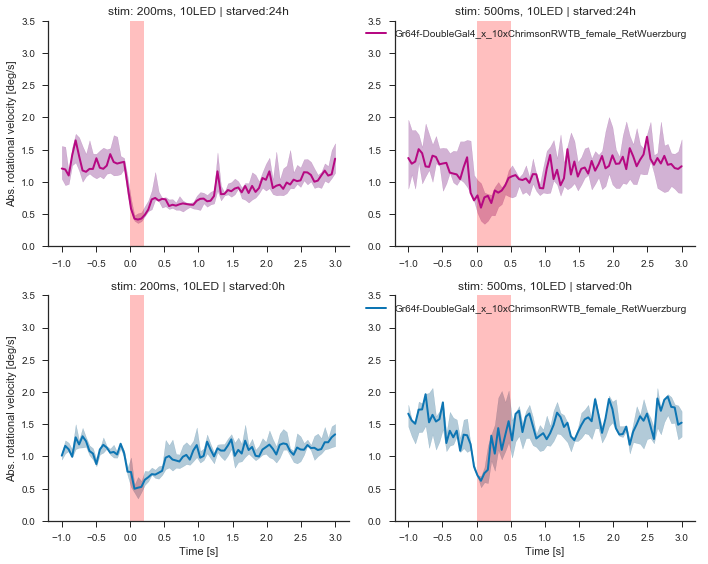

In [123]:
maxY = 3.5

fig = plt.figure(figsize=(10,4*max(len(measuredStarveLevels),2)))
for rowind, starved in enumerate(measuredStarveLevels):
    if starved == '0h': colMap = 'PuBu'
    elif 'Control' in genotype or 'control' in genotype or '_Wuerzburg' in genotype: colMap = 'Greens'
    else: colMap = 'RdPu'
    cNorm  = colors.Normalize(vmin=-5, vmax=maxExpRep)
    repCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=colMap)
    
    for colind, stim in enumerate(stimLevels):
        velos = np.nan*np.ones((len(repLevels), len(timeAx)))
        for ind, rep in enumerate(repLevels):
            rep_df = vrav_df.query('exprep == "'+rep+'" and stim == "'+stim+'" and starved == "'+starved+'"')
            if rep_df.empty:
                continue
            velos[ind,:] = rep_df['vr'].get_values()
        
        ax = fig.add_subplot(max(len(measuredStarveLevels),2),len(stimLevels),(rowind)*len(stimLevels) + (colind+1))
         
        repMedian = np.nanmedian(velos, axis=0)
        repIQR = np.nanpercentile(velos, [25, 75], axis=0)
        
        leg = ax.plot(timeAx, repMedian, color=repCMap.to_rgba(np.ceil(numRep/2)), linewidth=2)
        ax.fill_between(timeAx, repIQR[0,:], repIQR[1,:], color=repCMap.to_rgba(ind), alpha=0.3, label=None)

        ax.set_ylim(0,maxY)
        ax.set_title('stim: '+stim+', '+LEDlevel[:-1]+' | starved:'+starved, fontsize=12)
        if rowind==1: ax.set_xlabel('Time [s]')
        if colind==0: ax.set_ylabel('Abs. rotational velocity [deg/s]')     
        if colind==1: ax.legend(leg, [genotype],frameon=False)
        myAxisTheme(ax)
        
        ax.add_patch(Rectangle((0, 0), stimLevelRects[colind], maxY, facecolor='red', edgecolor='none', lw=1, alpha=0.25))

try:
    os.mkdir(plotSaveDir)
except OSError:
    print('Analysis folder already exists')
    
fig.tight_layout()
fig.savefig(plotSaveDir+sep+genotype+'_'+LEDlevel[:-1]+'_rot_repTriggeredAverages_repAverage.pdf', format = 'pdf')

### Plot with variance across pulse repeats

In [124]:
vt_df = pd.DataFrame(columns=['stim', 'exprep', 'pulserep', 'starved','time','timebins','timebinsf','vt'])
vr_df = pd.DataFrame(columns=['stim', 'exprep', 'pulserep', 'starved','time','timebins','timebinsf','vr'])

for stim in ['500ms', '200ms']:

    rootDir = baseDir + genotype + sep + LEDlevel + stim + sep + 'analysis'

    datList = [filepath.split(sep)[-1] for filepath in glob(rootDir + sep + '*.csv')]

    vt_datList = []
    vr_datList = []
    for fn in datList:
        if 'vTrans' in fn:
            vt_datList.append(fn)
        elif 'vRot' in fn:
            vr_datList.append(fn)
        else:
            pass
        
    for fi, currFile in enumerate(vt_datList):
        print(currFile)
        exprep = currFile.split('_')[6]

        # load file specifying data to be analysed
        datFile = open(rootDir+sep+currFile, 'r')
        csv_fileList = reader(datFile)

        vtvals = []

        for i, line in enumerate(csv_fileList):
            curr_df = pd.DataFrame(timeAx, columns=['time'])
            curr_df.insert(0, 'stim',stim)
            curr_df.insert(0, 'timebins',timeBins)
            curr_df.insert(0, 'timebinsf',timeBins2)
            curr_df.insert(1, 'vt', px2mm * 1./dt * np.asarray(line).astype('float'))
            curr_df.insert(3, 'exprep',exprep)
            curr_df.insert(4, 'pulserep',i+1)
            
            if '_24h' in currFile:
                curr_df.insert(3, 'starved','24h')
            elif '_12h' in currFile:
                curr_df.insert(3, 'starved','12h')
            elif '_0h' in currFile:
                curr_df.insert(3, 'starved','0h')
            vt_df = vt_df.append(curr_df, ignore_index = True)
        
        
        currFile = vr_datList[fi]
        print(currFile)
        exprep = currFile.split('_')[6]

        # load file specifying data to be analysed
        datFile = open(rootDir+sep+currFile, 'r')
        csv_fileList = reader(datFile)

        for i, line in enumerate(csv_fileList):
            curr_df = pd.DataFrame(timeAx, columns=['time'])
            curr_df.insert(0, 'stim',stim)
            curr_df.insert(0, 'timebins',timeBins)
            curr_df.insert(0, 'timebinsf',timeBins2)
            curr_df.insert(1, 'vr', 1./dt * np.asarray(line).astype('float'))
            curr_df.insert(3, 'exprep',exprep)
            curr_df.insert(4, 'pulserep',i+1)
            
            if '_24h' in currFile:
                curr_df.insert(3, 'starved','24h')
            elif '_12h' in currFile:
                curr_df.insert(3, 'starved','12h')
            elif '_0h' in currFile:
                curr_df.insert(3, 'starved','0h')
            vr_df = vr_df.append(curr_df, ignore_index = True)
        

Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_0h_rep1_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_0h_rep3_vRot_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep1_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep1_vRot_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_0h_rep3_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep3_vRot_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep4_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_0h_rep2_vRot_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep5_vTrans_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep4_vRot_triggeredAverage.csv
Gr64f-DoubleGal4_x_10xChrimsonRWTB_RetWuerzburg_10LED_24h_rep2_vTrans_triggeredAverage.csv
Gr64f-DoubleG

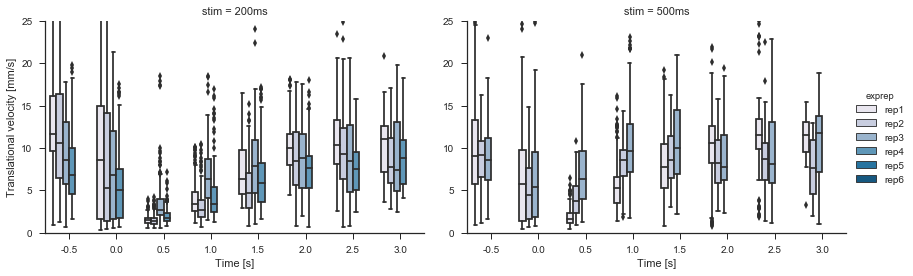

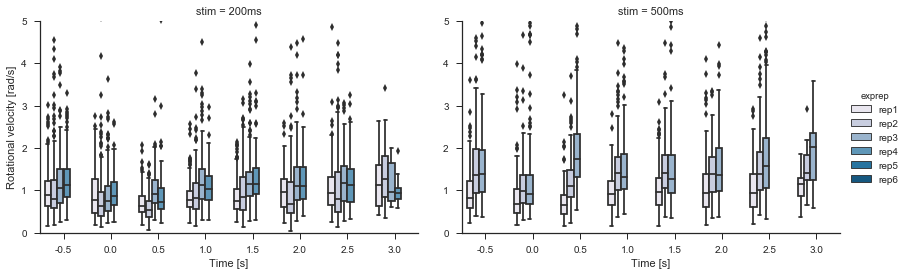

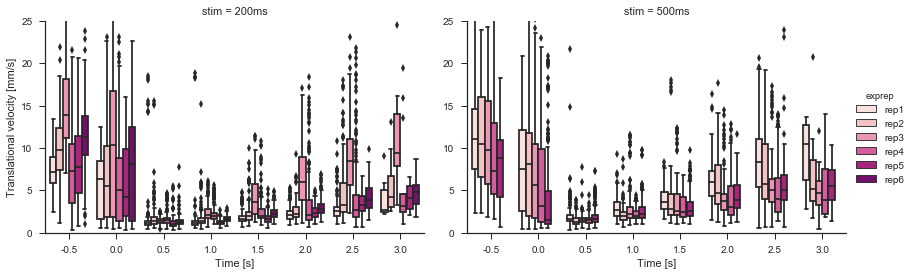

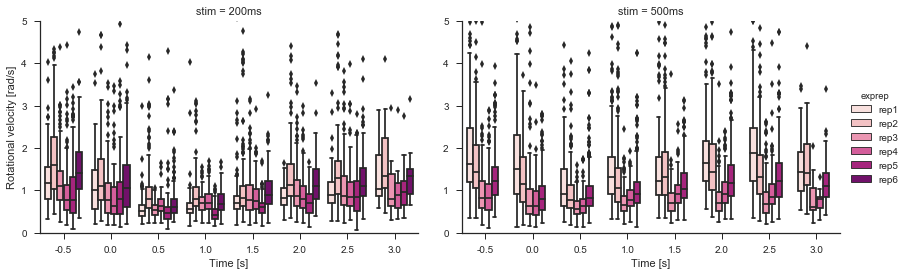

In [125]:
groups = [('fed', '0h'),('starved24h', '24h')]
colorpal = [sns.color_palette("GnBu"), sns.cubehelix_palette(6), sns.cubehelix_palette(6),sns.cubehelix_palette(6)]

for ind, group in enumerate(groups):
    bp_vt_df = vt_df.query('starved == "'+group[1]+'"')
    bp_vr_df = vr_df.query('starved == "'+group[1]+'"')
    sns.set(style="ticks", color_codes=False)
    
    if group[1] == '0h': colMap = 'PuBu'
    elif 'Control' in genotype or 'control' in genotype or '_Wuerzburg' in genotype: colMap = 'Greens'
    else: colMap = 'RdPu'

    if not bp_vt_df.empty:
        bp = sns.factorplot(data=bp_vt_df, x="timebins", y="vt", hue="exprep",
                            hue_order=repOrder, col="stim",col_order=stimLevels,
                            palette=colMap, kind='box', aspect=1.5)
        plt.ylim(0, 25)
        bp.set_axis_labels("Time [s]", "Translational velocity [mm/s]")
        bp.savefig(plotSaveDir+sep+genotype+'_'+group[0]+'_vTrans_boxplot.pdf', format = 'pdf')

    if not bp_vr_df.empty:
        bp = sns.factorplot(data=bp_vr_df, x="timebins", y="vr", hue="exprep",
                            hue_order=repOrder, col="stim",col_order=stimLevels,
                            palette=colMap, kind='box', aspect=1.5)
        plt.ylim(0, 5)
        bp.set_axis_labels("Time [s]", "Rotational velocity [rad/s]")
        bp.savefig(plotSaveDir+sep+genotype+'_'+group[0]+'_vRot_boxplot.pdf', format = 'pdf')

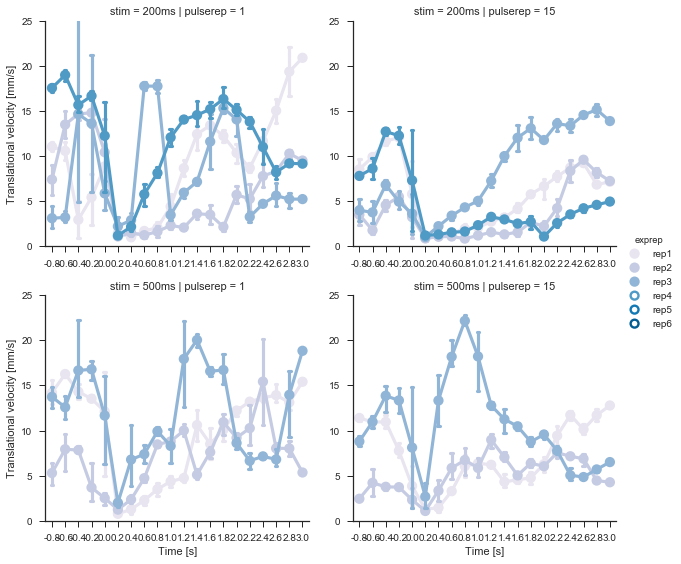

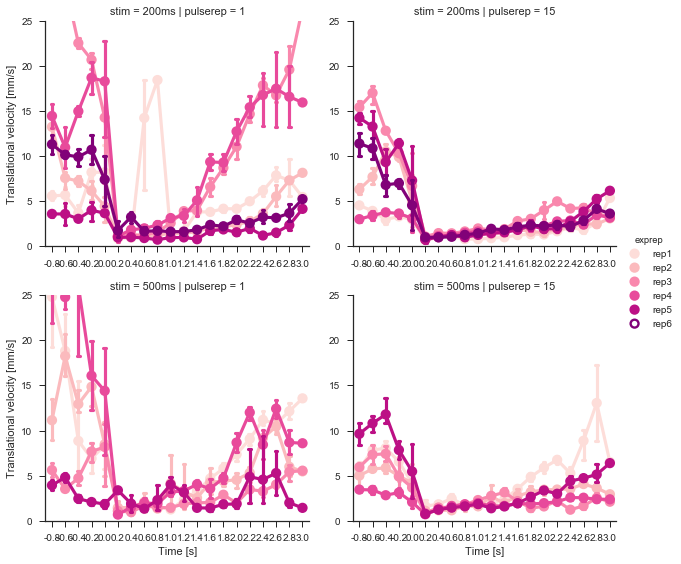

In [126]:
groups = [('fed', '0h'),('starved24h', '24h')]
colorpal = [sns.color_palette("GnBu"), sns.cubehelix_palette(6), sns.cubehelix_palette(6),sns.cubehelix_palette(6)]

for ind, group in enumerate(groups):
    sns.set(style="ticks", color_codes=False)
    pulse_df = vt_df.query('(pulserep == 1 or pulserep == 15) and (starved == "'+group[1]+'")')
    
    if group[1] == '0h': colMap = 'PuBu'
    elif 'Control' in genotype or 'control' in genotype or '_Wuerzburg' in genotype: colMap = 'Greens'
    else: colMap = 'RdPu'
    
    if not pulse_df.empty:
        g = sns.factorplot(x="timebinsf", y="vt", hue="exprep", col="pulserep",row="stim", data=pulse_df,
                           hue_order=repOrder, row_order=stimLevels,
                           capsize=.2, palette=colMap, size=4, aspect=1.1)
        g.set_axis_labels("Time [s]", "Translational velocity [mm/s]")
        plt.ylim(0, 25)
        g.savefig(plotSaveDir+sep+genotype+'_'+group[0]+'_pulseComp.pdf', format = 'pdf')

Analysis folder already exists


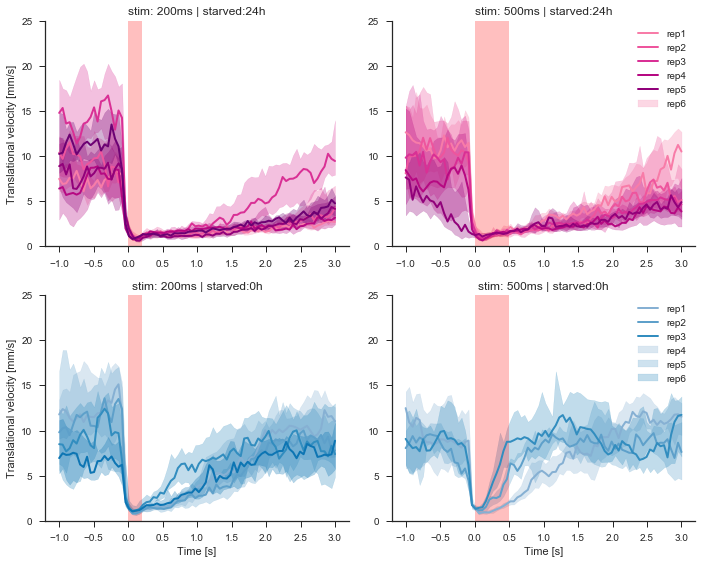

In [127]:
stimLevelRects = [0.2, 0.5]
maxY = 25
repLevels = ['rep'+str(repn) for repn in range(1,maxExpRep+1)]

fig = plt.figure(figsize=(10,4*max(len(measuredStarveLevels),2)))

measuredStarveLevels = []
for starved in starveLevels:
    if not vtav_df.query('starved == "'+starved+'"').empty:
        measuredStarveLevels.append(starved)

for rowind, starved in enumerate(measuredStarveLevels):
    
    if starved == '0h': colMap = 'PuBu'
    elif 'Control' in genotype or 'control' in genotype or '_Wuerzburg' in genotype: colMap = 'Greens'
    else: colMap = 'RdPu'
    cNorm  = colors.Normalize(vmin=-5, vmax=maxExpRep)
    repCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=colMap)
    
    for colind, stim in enumerate(stimLevels):
        ax = fig.add_subplot(max(len(measuredStarveLevels),2),len(stimLevels),(rowind)*len(stimLevels) + (colind+1))
        for ind, rep in enumerate(repLevels):
            rep_df = vt_df.query('exprep == "'+rep+'" and stim == "'+stim+'" and starved == "'+starved+'"')
            
            if rep_df.empty: continue

            vtPulse = rep_df['vt'].values[:maxPulseRep*len(timeAx)].reshape((maxPulseRep,len(timeAx)),order='C')
            vtMedian = np.nanmedian(vtPulse, axis=0)
            vtIQR = np.percentile(vtPulse, [25, 75], axis=0)
            
            ax.plot(timeAx, vtMedian, color=repCMap.to_rgba(ind), linewidth=2)
            ax.fill_between(timeAx, vtIQR[0,:], vtIQR[1,:], color=repCMap.to_rgba(ind), alpha=0.3, label=None)
            ax.set_ylim(0,maxY) 

        ax.set_title('stim: '+stim+' | starved:'+starved, fontsize=12)
        if rowind==1: ax.set_xlabel('Time [s]')
        if colind==0: ax.set_ylabel('Translational velocity [mm/s]')     
        if colind==1: ax.legend(repLevels, loc=1)
        myAxisTheme(ax)
        
        ax.add_patch(Rectangle((0, 0), stimLevelRects[colind], maxY, facecolor='red', edgecolor='none', lw=1, alpha=0.25)) 
        
        
try:
    os.mkdir(plotSaveDir)
except OSError:
    print('Analysis folder already exists')
    
fig.tight_layout()
fig.savefig(plotSaveDir+sep+genotype+'_medianIQRTriggeredAverages.pdf', format = 'pdf')

Analysis folder already exists


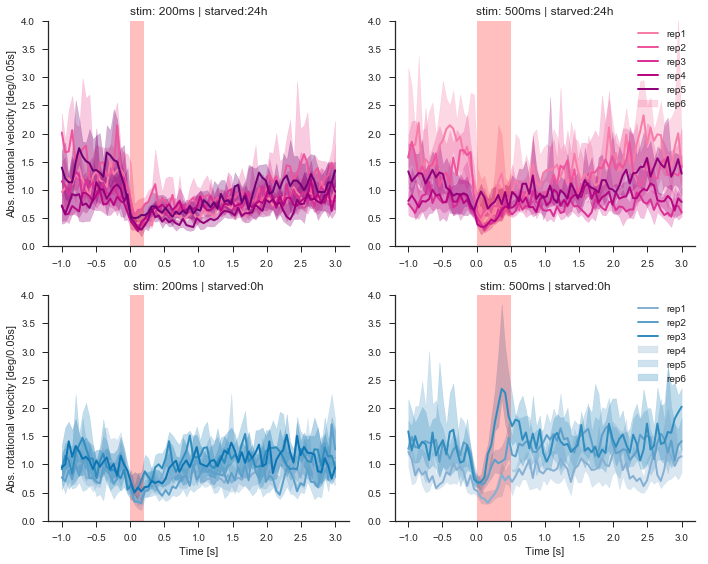

In [128]:
maxY = 4

fig = plt.figure(figsize=(10,4*max(len(measuredStarveLevels),2)))

for rowind, starved in enumerate(measuredStarveLevels):
    
    if starved == '0h': colMap = 'PuBu'
    elif 'Control' in genotype or 'control' in genotype or '_Wuerzburg' in genotype: colMap = 'Greens'
    else: colMap = 'RdPu'
    cNorm  = colors.Normalize(vmin=-5, vmax=maxExpRep)
    repCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=colMap)
    
    for colind, stim in enumerate(stimLevels):
        ax = fig.add_subplot(max(len(measuredStarveLevels),2),len(stimLevels),(rowind)*len(stimLevels) + (colind+1))
        for ind, rep in enumerate(repLevels):
            rep_df = vr_df.query('exprep == "'+rep+'" and stim == "'+stim+'" and starved == "'+starved+'"')
            
            if rep_df.empty: continue

            vrPulse = rep_df['vr'].values[:maxPulseRep*len(timeAx)].reshape((maxPulseRep,len(timeAx)),order='C')
            vrMedian = np.nanmedian(vrPulse, axis=0)
            vrIQR = np.percentile(vrPulse, [25, 75], axis=0)
            
            ax.plot(timeAx, vrMedian, color=repCMap.to_rgba(ind), linewidth=2)
            ax.fill_between(timeAx, vrIQR[0,:], vrIQR[1,:], color=repCMap.to_rgba(ind), alpha=0.3, label=None)
            ax.set_ylim(0,maxY) 

        ax.set_title('stim: '+stim+' | starved:'+starved, fontsize=12)
        if rowind==1: ax.set_xlabel('Time [s]')
        if colind==0: ax.set_ylabel('Abs. rotational velocity [deg/0.05s]')     
        if colind==1: ax.legend(repLevels, loc=1)
        myAxisTheme(ax)
        
        ax.add_patch(Rectangle((0, 0), stimLevelRects[colind], maxY, facecolor='red', edgecolor='none', lw=1, alpha=0.25)) 
        
try:
    os.mkdir(plotSaveDir)
except OSError:
    print('Analysis folder already exists')
    
fig.tight_layout()
fig.savefig(plotSaveDir+sep+genotype+'_rot_medianIQRTriggeredAverages.pdf', format = 'pdf')